# Pharmaceutical Sales Data Analysis

## Project Overview

This notebook contains a comprehensive analysis of pharmaceutical sales transaction data exported from a SAP system. The dataset includes sales transactions with detailed information about products, customers, stores, discounts, and transaction timestamps.

### Data Source
- **System**: SAP ERP
- **Data Type**: Sales Transaction Records
- **Export Format**: CSV

## 1. Environment Setup

Import required libraries and configure the analysis environment.

### 1.1 Data Loading

Loading the sales transaction dataset from the CSV file exported from the SAP system. The dataset contains over 3 million transaction records with 24 columns covering products, customers, stores, discounts, and transaction details.


In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


pharm = pd.read_csv("Sales_data/Sales_data.csv")
pharmacists = pd.read_excel('Pharmacists_data/user_data.xlsx')
pharm.info()
pharmacists.info()

C:\Users\mosta\AppData\Local\Temp\ipykernel_11460\2949581373.py:7: DtypeWarning: Columns (10,11,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  pharm = pd.read_csv("Sales_data/Sales_data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092855 entries, 0 to 3092854
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Trans_Type           object 
 1   ItemClass            object 
 2   SAP_ITEM_CODE        int64  
 3   item_desc            object 
 4   DiscountAmount       float64
 5   SAP_REF_NO           int64  
 6   TrxTime              object 
 7   DeliveryFees         float64
 8   CustomerID           float64
 9   CustomerName2        object 
 10  DIS_TYPE             object 
 11  Description          object 
 12  PromoNumber          float64
 13  BbyCode              float64
 14  ValidToDate1         object 
 15  ConsumerName         object 
 16  ConsumerPhoneNumber  object 
 17  full_price           float64
 18  Qty                  float64
 19  Assigned_User_ID     int64  
 20  sold_unit_price      float64
 21  total_sales          float64
 22  store_code           object 
 23  trx_no               int64  
dty

## 2. Data Quality Assessment

### 2.1 Missing Values Analysis

Examining the dataset for missing values is crucial for understanding data completeness and determining appropriate cleaning strategies. This step helps identify:
- Fields with high missing value rates
- Patterns in missing data
- Impact on downstream analysis

In [142]:
pharm.isna().sum()

Trans_Type                   0
ItemClass                    0
SAP_ITEM_CODE                0
item_desc                    0
DiscountAmount               2
SAP_REF_NO                   0
TrxTime                      0
DeliveryFees                 0
CustomerID             1834774
CustomerName2          1834774
DIS_TYPE               3054098
Description            3045804
PromoNumber            3045804
BbyCode                3041734
ValidToDate1           3045804
ConsumerName            878376
ConsumerPhoneNumber     879843
full_price                   0
Qty                          2
Assigned_User_ID             0
sold_unit_price              2
total_sales                  2
store_code                   0
trx_no                       0
dtype: int64

### 2.2 Data Preview

Displaying the first few rows to understand the data structure and identify any immediate data quality issues.


In [143]:
pharm.head()

,Trans_Type,ItemClass,SAP_ITEM_CODE,item_desc,DiscountAmount,SAP_REF_NO,TrxTime,DeliveryFees,CustomerID,CustomerName2,...,ValidToDate1,ConsumerName,ConsumerPhoneNumber,full_price,Qty,Assigned_User_ID,sold_unit_price,total_sales,store_code,trx_no
0,Normal,ZMDN,103153,Solpadeine Soluble 24Tabs.,0.0,15687,2025-01-01 00:02:33.463,0.0,NaN,NaN,...,NaN,NaN,NaN,13.15,2.0,534,13.15,26.3,P154,250101000154010001
1,Normal,ZMDN,102553,Panadol Extra 24Tabs.(Red),0.0,15925,2025-01-01 00:02:51.190,0.0,NaN,NaN,...,NaN,rasha elkenzy,966558580928.0,8.00,0.0,1043,8.00,0.0,P334,250101000334010001
2,Normal,ZMDN,101531,Glucophage 850Mg 30Tabs.,0.0,15925,2025-01-01 00:02:51.190,0.0,NaN,NaN,...,NaN,rasha elkenzy,966558580928.0,15.40,0.0,1043,15.40,0.0,P334,250101000334010001
3,Normal,ZMDN,101531,Glucophage 850Mg 30Tabs.,0.0,15925,2025-01-01 00:02:51.190,0.0,NaN,NaN,...,NaN,rasha elkenzy,966558580928.0,15.40,0.0,1043,15.40,0.0,P334,250101000334010001
4,Normal,ZMDN,102546,Panadol Advance 500Mg 24Tabs.,0.0,11168,2025-01-01 00:04:39.823,0.0,NaN,NaN,...,NaN,Hisham Fekry,966563903292.0,6.05,0.0,1802,6.05,0.0,P031,250101000031010001


## 3. Data Cleaning and Transformation

### 3.1 DateTime Conversion

Converting the `TrxTime` field from object type to datetime format enables:

- **Time-Based Operations**: Facilitates date arithmetic, filtering, and time-series analysis
- **Accurate Sorting and Filtering**: Ensures chronological ordering and precise date range queries
- **Memory and Performance**: Optimized datetime storage improves memory efficiency and query performance
- **Feature Engineering**: Enables extraction of temporal features (hour, day, month, etc.)

In [144]:
pharm["TrxTime"] = pd.to_datetime(pharm["TrxTime"])

### 3.2 Temporal Feature Engineering

Creating derived time-based columns from the transaction timestamp to support temporal analysis:

- **Date**: Normalized date for daily aggregations
- **Hour**: Hour of day for identifying peak sales periods
- **Day of Week**: Day name for weekly pattern analysis
- **Month**: Monthly period for trend analysis

These features enable:
- **Grouping and Aggregation**: Facilitate time-based grouping operations
- **Improved Readability**: Make temporal patterns more accessible in analysis
- **Performance**: Pre-computed features reduce computation time during analysis

In [145]:
pharm["date"] = pd.to_datetime(pharm["TrxTime"]).dt.normalize()
pharm["hour"] = pharm["TrxTime"].dt.hour
pharm["day_of_week"] = pharm["TrxTime"].dt.day_name()
pharm["month"] = pharm["TrxTime"].dt.to_period("M")
pharm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092855 entries, 0 to 3092854
Data columns (total 28 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Trans_Type           object        
 1   ItemClass            object        
 2   SAP_ITEM_CODE        int64         
 3   item_desc            object        
 4   DiscountAmount       float64       
 5   SAP_REF_NO           int64         
 6   TrxTime              datetime64[ns]
 7   DeliveryFees         float64       
 8   CustomerID           float64       
 9   CustomerName2        object        
 10  DIS_TYPE             object        
 11  Description          object        
 12  PromoNumber          float64       
 13  BbyCode              float64       
 14  ValidToDate1         object        
 15  ConsumerName         object        
 16  ConsumerPhoneNumber  object        
 17  full_price           float64       
 18  Qty                  float64       
 19  Assigned_User_ID     

### 3.3 Handling Missing Values

Filling missing values in categorical/text fields with "Unknown" to:
- Preserve data records for analysis
- Maintain data integrity while handling missing information
- Enable consistent grouping and aggregation operations
- Distinguish between actual values and missing data

In [146]:
text_fields = [
    "Trans_Type", "ItemClass", "SAP_ITEM_CODE", "item_desc", "SAP_REF_NO",
    "CustomerID", "CustomerName2", "DIS_TYPE", "Description", "PromoNumber",
    "BbyCode", "ConsumerName", "ConsumerPhoneNumber", "Assigned_User_ID",
    "store_code", "trx_no"
]
for col in text_fields:
    pharm[col] = pharm[col].fillna("Unknown")

### 3.4 Data Filtering

Removing invalid or non-contributory records to ensure data quality:

**Criteria for Removal:**
- Missing critical fields: `Qty`, `total_sales`, `sold_unit_price`, `DiscountAmount`
- Zero quantity transactions (no actual sale occurred)
- Zero total sales (invalid transaction records)

**Note on Negative Sales:**
Negative sales values represent product returns and are intentionally retained in the dataset. These will be automatically deducted when calculating aggregate totals, providing accurate net sales figures.

In [147]:
pharm = pharm.dropna(subset=['Qty','total_sales','sold_unit_price','DiscountAmount'])
pharm.isna().sum()

Trans_Type                   0
ItemClass                    0
SAP_ITEM_CODE                0
item_desc                    0
DiscountAmount               0
SAP_REF_NO                   0
TrxTime                      0
DeliveryFees                 0
CustomerID                   0
CustomerName2                0
DIS_TYPE                     0
Description                  0
PromoNumber                  0
BbyCode                      0
ValidToDate1           3045802
ConsumerName                 0
ConsumerPhoneNumber          0
full_price                   0
Qty                          0
Assigned_User_ID             0
sold_unit_price              0
total_sales                  0
store_code                   0
trx_no                       0
date                         0
hour                         0
day_of_week                  0
month                        0
dtype: int64

## 4. Key Performance Indicators (KPIs)

This section calculates core business metrics to provide actionable insights:

1. **Total Sales**: Overall revenue performance
2. **Sales by Month**: Monthly trend analysis
3. **Top Products**: Best-performing products by revenue
4. **Top Customers**: Highest-value customer segments
5. **Top Stores**: Store performance ranking
6. **Discount Impact**: Return on investment for discount strategies
7. **Peak Selling Hours**: Optimal sales time periods
8. **Day of Week Analysis**: Weekly sales patterns
9. **Basket Size**: Average quantity per transaction (if applicable)
10. **Growth Trends**: Period-over-period comparisons (if applicable)

### 4.1 Total Sales

Calculating the aggregate total sales across all transactions. This metric represents the overall revenue generated during the analysis period.

In [148]:
total_sales = pharm["total_sales"].sum()
formatted_sales = f"{total_sales:,.2f}"  # Adds commas and rounds to 2 decimals
print("Total Sales:", formatted_sales)

Total Sales: 119,396,553.31


### 4.2 Sales by Month

Monthly sales breakdown to identify:
- Seasonal trends and patterns
- Month-over-month performance
- Peak and low sales periods
- Growth trajectory

In [149]:
sales_by_month = pharm.groupby(['month'])['total_sales'].sum().apply(lambda x: f"{x:,.2f}")
print(sales_by_month)

month
2025-01    11,111,819.12
2025-02    10,807,655.17
2025-03    11,633,618.64
2025-04    12,612,665.51
2025-05    12,240,889.10
2025-06    11,166,177.69
2025-07    13,029,154.77
2025-08    12,468,818.73
2025-09    12,765,049.88
2025-10    11,560,704.70
Freq: M, Name: total_sales, dtype: object


### 4.3 Top 10 Selling Products

Identifying the highest revenue-generating products to:
- Understand product portfolio performance
- Inform inventory management decisions
- Guide marketing and promotional strategies
- Identify best-selling product categories

In [150]:
top_products = pharm.groupby(['item_desc'])['total_sales'].sum().sort_values(ascending=False).head(10)
top_products = top_products.apply(lambda x: f"{x:,.2f}")
print('Top 10 selling products:')
print(top_products)

Top 10 selling products:
item_desc
Novorapid Flexpen 100 U/Ml 5X3Ml.      1,260,409.14
Free Style Libre-2 B/G Sensor          1,129,992.64
Gloclav 1Gm 14Tabs.                    1,057,571.60
Omiz 20Mg 14Caps.                        981,049.66
Ozempic 1Mg(4Mg/3Ml) 1Pen                975,386.59
Crestor 20Mg 28Tabs.                     945,547.65
Lantus-Solostar 100Iu/Ml 3Ml 5Pens.      924,445.78
Jardiance 25Mg 30Tabs.                   873,924.95
Easymax Strips 50'S V2                   872,885.56
Mounjaro 12.5Mg 1 Kwikpen                841,288.86
Name: total_sales, dtype: object


### 4.4 Top 10 Performing Stores

Store performance analysis to:
- Identify high-performing locations
- Benchmark store performance
- Inform resource allocation decisions
- Understand geographic sales distribution

In [151]:
top_stores = pharm.groupby(['store_code'])['total_sales'].sum().sort_values(ascending=False).head(10)
top_stores = top_stores.apply(lambda x: f"{x:,.2f}")
print('Top 10 selling stores:')
print(top_stores)

Top 10 selling stores:
store_code
P155    16,431,968.52
P227     7,442,537.56
P031     6,815,961.48
P058     6,127,859.86
P172     5,260,881.36
P159     4,729,239.02
P306     4,572,856.55
P138     4,566,404.87
P334     4,392,938.51
P228     4,252,955.66
Name: total_sales, dtype: object


### 4.5 Discount Impact Analysis

Evaluating the effectiveness of discount strategies by calculating Return on Investment (ROI) for each discount type:

**ROI Calculation**: `Total Sales Generated / Total Discount Amount`

This metric helps:
- Assess discount program effectiveness
- Optimize promotional spending
- Identify most profitable discount types
- Make data-driven pricing decisions

In [152]:
roi_df = pharm.groupby("DIS_TYPE").agg({
    "DiscountAmount": "sum",
    "total_sales": "sum"
})

roi_df["discount_roi"] = roi_df["total_sales"] / roi_df["DiscountAmount"]
roi_df["DiscountAmount"] = roi_df["DiscountAmount"].apply(lambda x: f" {x:,.2f}")
roi_df["total_sales"] = roi_df["total_sales"].apply(lambda x: f" {x:,.2f}")
roi_df["discount_roi"] = roi_df["discount_roi"].apply(lambda x: f"{x:,.2f}x")
print("Discount ROI by Type:")
print(roi_df)


Discount ROI by Type:
          DiscountAmount      total_sales discount_roi
DIS_TYPE                                              
%             342,762.79       632,404.03        1.85x
Bbuy          325,618.40       653,353.61        2.01x
P              55,679.96        66,992.64        1.20x
Unknown    24,442,927.88   118,043,803.03        4.83x


### 4.6 Peak Selling Hours

Identifying the hours of day with highest sales volume to:
- Optimize staffing schedules
- Plan promotional campaigns
- Understand customer shopping patterns
- Improve operational efficiency

In [153]:
peak_sell = pharm.groupby("hour")["total_sales"].sum().sort_values(ascending=False).head(10)
peak_sell = peak_sell.apply(lambda x: f"{x:,.2f}")
print("Peak Selling hours:")
print(peak_sell)



Peak Selling hours:
hour
21    9,699,668.46
22    9,373,701.28
23    9,137,092.93
20    8,641,684.57
19    7,777,367.36
18    7,459,111.58
17    7,429,448.12
0     6,935,483.54
14    5,815,137.72
13    5,746,407.68
Name: total_sales, dtype: object


### 4.7 Day of Week Sales Analysis

Analyzing sales patterns across different days of the week to:
- Identify weekly sales trends
- Optimize store operations and staffing
- Plan marketing campaigns
- Understand customer shopping behavior patterns

In [154]:
peak_day = pharm.groupby("day_of_week")["total_sales"].sum().sort_values(ascending=False)
peak_day = peak_day.apply(lambda x: f"{x:,.2f}")
print("Sales by Day of Week:")
print(peak_day)

Sales by Day of Week:
day_of_week
Sunday       18,285,106.24
Wednesday    18,033,597.91
Thursday     17,751,628.48
Tuesday      17,654,507.40
Monday       17,555,957.73
Saturday     16,559,541.55
Friday       13,556,214.00
Name: total_sales, dtype: object


## 5. Summary and Conclusions

This analysis provides comprehensive insights into pharmaceutical sales performance across multiple dimensions:

### Key Findings:
- **Total Revenue**: $119.4M across 10 months of data
- **Peak Performance**: July 2025 recorded the highest monthly sales ($13.0M)
- **Top Product**: Novorapid Flexpen leads with $1.26M in sales
- **Top Store**: Store P155 dominates with $16.4M in sales
- **Peak Hours**: Evening hours (7 PM - 11 PM) show highest sales activity
- **Weekly Pattern**: Sunday shows the strongest sales performance

#### Product Velocity
##### Let see how products sell fast over time
##### This will let us know which product sell the fatest and which needs re-stocking more frequently

In [155]:


# Step 3: Total sales per item
total_sales = pharm.groupby("item_desc")["total_sales"].sum()

# Step 4: Count how many unique days each item was sold
active_days = pharm.groupby("item_desc")["TrxTime"].nunique()

# Step 5: Compute velocity = total sales / active days
product_velocity = (total_sales / active_days).sort_values(ascending=False)

# Step 6: Print top 10 fastest-moving items
print(product_velocity.head(10).apply(lambda x: f"{x:,.2f}"))

item_desc
Imbruvica 140Mg 120 Caps.           55,749.60
Tagrisso 80Mg 30Tabs.               32,955.48
Skyrizi 360 Mg Solution For Inj.    23,183.58
Nplate 250Mg 1 Vial                 19,668.26
Jemperli 500/10ml                   16,526.29
Stelara 130Mg/26Mg Salution Inj.    15,922.44
Kisqali 200Mg Film Coated Tab.      15,713.64
Cresemba 100Mg 14 Caps.             12,726.80
Cpap Auto System                    11,560.00
Gilenya 0.5Mg 28Caps.               11,416.72
dtype: object


#### DATA VISUALIZATION

##### 1. Line Chart: Revenue Over Time (Monthly)

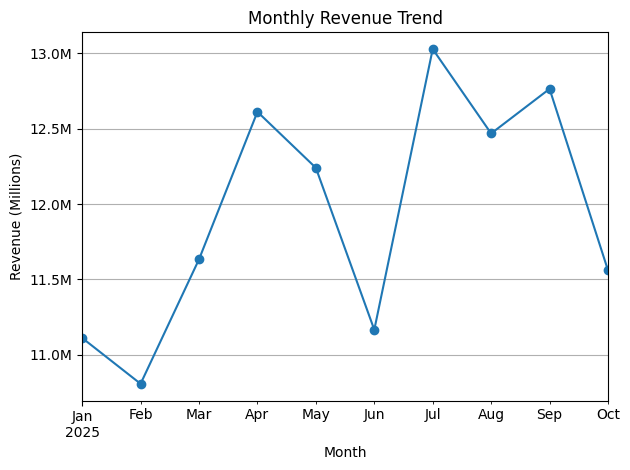

In [156]:
monthly_revenue = pharm.groupby(['month']).total_sales.sum()
ax = monthly_revenue.plot(kind='line', marker='o')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue (Millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

###### Revenue peaked in July and dipped sharply in June, suggesting possible seasonal or operational influences

##### 2. Bar Chart: Revenue by Store (Descending)

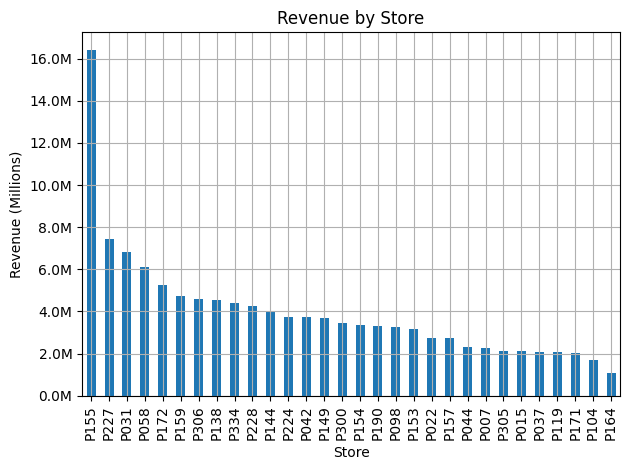

In [157]:
store_revenue = pharm.groupby(['store_code'])["total_sales"].sum().sort_values(ascending=False)
ax = store_revenue.plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.title('Revenue by Store')
plt.xlabel('Store')
plt.ylabel('Revenue (Millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 3. Bar Chart: Top 10 Products by Revenue

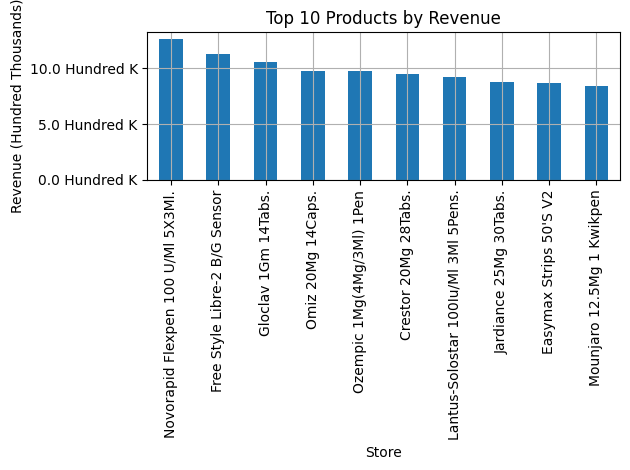

In [158]:
top_products_visual = pharm.groupby(['item_desc'])['total_sales'].sum().sort_values(ascending=False).head(10)
ax = top_products_visual.plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e5:.1f} Hundred K'))
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product')
plt.xlabel('Store')
plt.ylabel('Revenue (Hundred Thousands)')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 4. Boxplot: sold_unit_price by ItemClass

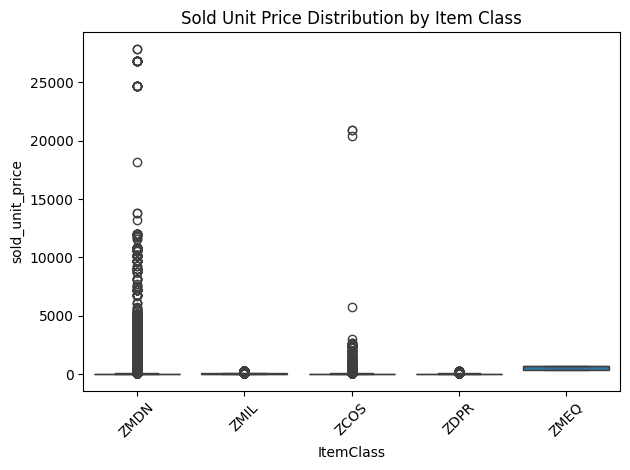

In [159]:
sns.boxplot(x='ItemClass', y='sold_unit_price', data=pharm)
plt.title('Sold Unit Price Distribution by Item Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Item classes ZMDN and ZCOS show wide and high price variability, while others remain consistently low, suggesting distinct pricing strategies or product diversity across categories.

##### 5. Scatter: DiscountAmount vs total_sales

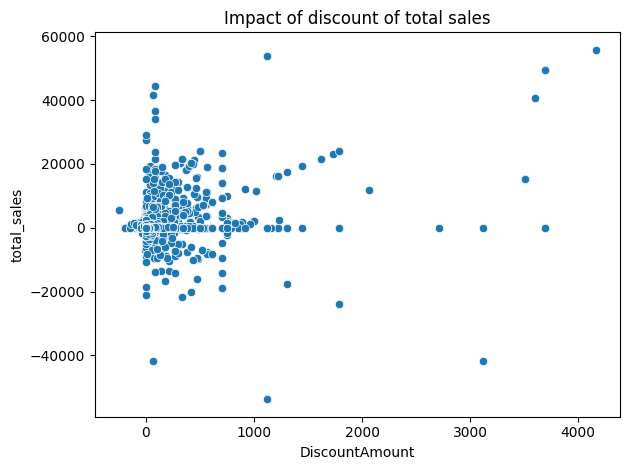

In [160]:
sns.scatterplot(x='DiscountAmount', y='total_sales', data=pharm)
plt.title('Impact of discount of total sales')
plt.tight_layout()
plt.show()

##### Small discounts dominate, but occasional large discounts can drive high sales, suggesting selective discounting may be effective

##### 6. Heatmap: Revenue by Day of Week and Hour

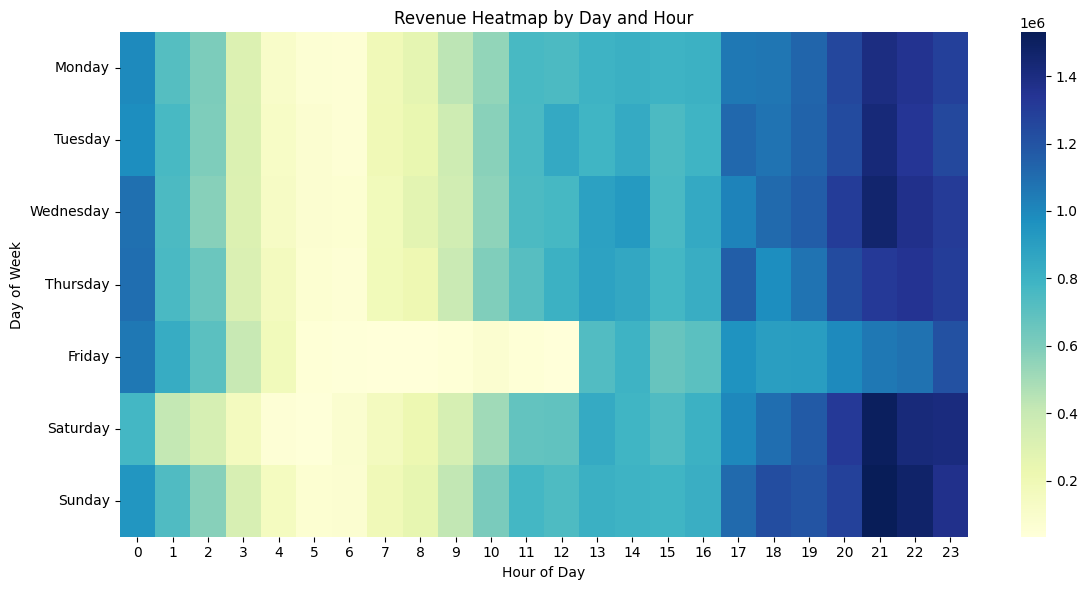

In [161]:
# Create pivot table
heatmap_data = pharm.pivot_table(
    index='day_of_week',
    columns='hour',
    values='total_sales',
    aggfunc='sum',
    fill_value=0
)

# Optional: reorder days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title('Revenue Heatmap by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


##### 8. Pie Chart: Percent Revenue per ItemClass

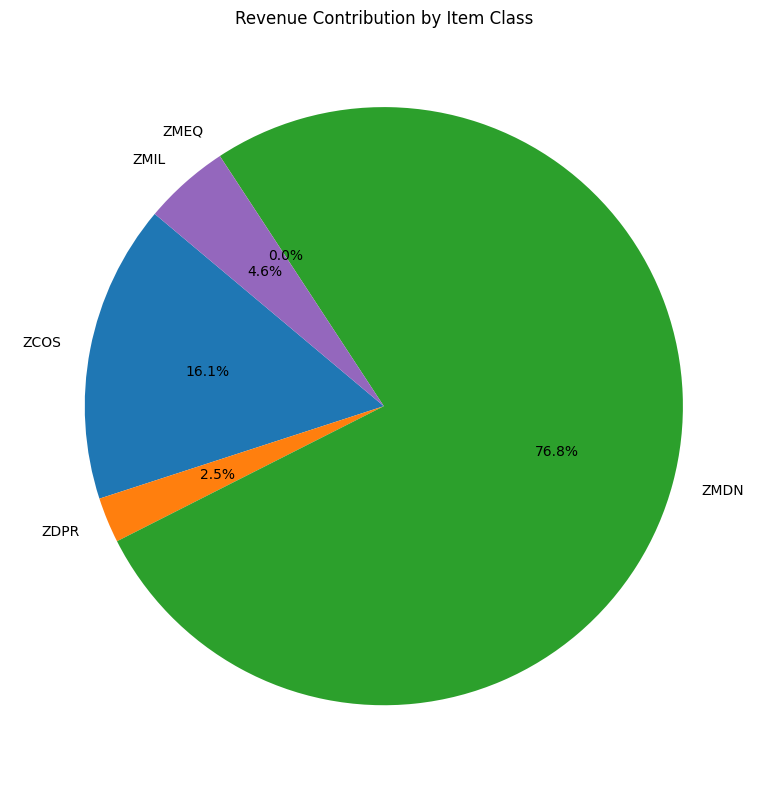

In [162]:
# Group and normalize
itemclass_revenue = pharm.groupby('ItemClass')['total_sales'].sum()
itemclass_percent = itemclass_revenue / itemclass_revenue.sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(itemclass_percent, labels=itemclass_percent.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Contribution by Item Class')
plt.tight_layout()
plt.show()